In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from seaborn import regression

In [3]:
sns.set()

In [4]:
plt.style.use('seaborn-whitegrid')

C:\Users\tuanq\AppData\Local\Temp\ipykernel_31372\2414357448.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [7]:
data = pd.read_csv("Resources/fx.csv")
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,01-Jan-21,0.777180,0.820760,0.769823,0.770297,0.770297,0
1,04-Jan-21,0.771300,0.774200,0.765660,0.771230,0.771230,0
2,05-Jan-21,0.766980,0.775300,0.766289,0.767100,0.767100,0
3,06-Jan-21,0.776280,0.782038,0.773431,0.776600,0.776600,0
4,07-Jan-21,0.781540,0.781540,0.772770,0.781700,0.781700,0
...,...,...,...,...,...,...,...
738,01-Nov-23,0.633995,0.639321,0.631930,0.633995,0.633995,0
739,02-Nov-23,0.642260,0.645610,0.641410,0.642260,0.642260,0
740,03-Nov-23,0.642790,0.650915,0.642100,0.642790,0.642790,0
741,06-Nov-23,0.651687,0.652500,0.649400,0.651687,0.651687,0


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       743 non-null    datetime64[ns]
 1   Open       743 non-null    float64       
 2   High       743 non-null    float64       
 3   Low        743 non-null    float64       
 4   Close      743 non-null    float64       
 5   Adj Close  743 non-null    float64       
 6   Volume     743 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.8 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,0.77718,0.820760,0.769823,0.770297,0.770297,0
1,2021-01-04,0.77130,0.774200,0.765660,0.771230,0.771230,0
2,2021-01-05,0.76698,0.775300,0.766289,0.767100,0.767100,0
3,2021-01-06,0.77628,0.782038,0.773431,0.776600,0.776600,0
4,2021-01-07,0.78154,0.781540,0.772770,0.781700,0.781700,0


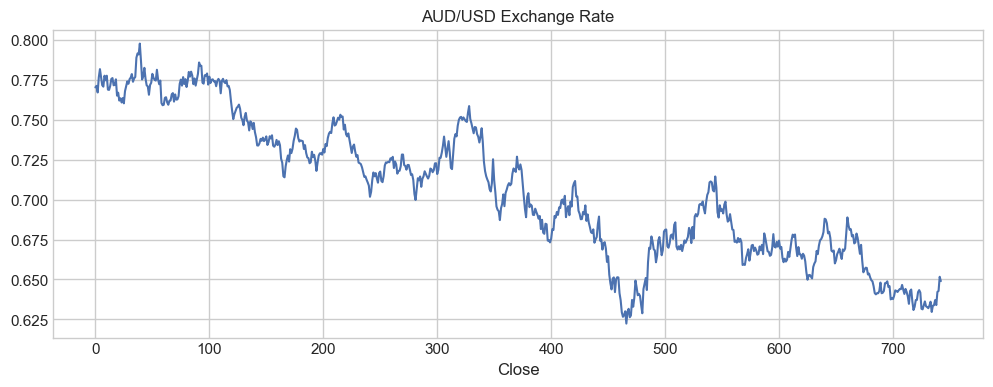

In [14]:
plt.figure(figsize=(12,4))
plt.title("AUD/USD Exchange Rate")
plt.xlabel('Date')
plt.xlabel('Close')
plt.plot(data['Close'])
plt.show()

In [15]:
x=data[['Open', 'High', 'Low']]
y=data['Close']
x=x.to_numpy()
y=y.to_numpy()
y=y.reshape(-1,1)


In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeRegressor

model= DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [23]:
y_predicted = model.predict(xtest)

In [24]:
y_predicted

array([0.66483 , 0.71095 , 0.6476  , 0.71208 , 0.73771 , 0.77435 ,
       0.68738 , 0.693   , 0.6727  , 0.67052 , 0.641671, 0.7198  ,
       0.721652, 0.77251 , 0.6895  , 0.696782, 0.71588 , 0.71785 ,
       0.7145  , 0.66342 , 0.790883, 0.77455 , 0.6327  , 0.67258 ,
       0.736822, 0.70355 , 0.755481, 0.75136 , 0.71665 , 0.7772  ,
       0.744502, 0.77225 , 0.69097 , 0.768699, 0.689398, 0.71032 ,
       0.6297  , 0.702928, 0.740933, 0.697282, 0.7737  , 0.726143,
       0.70683 , 0.77225 , 0.6297  , 0.761998, 0.657371, 0.69035 ,
       0.777605, 0.6847  , 0.761998, 0.7543  , 0.642162, 0.728221,
       0.679279, 0.69827 , 0.777   , 0.78381 , 0.740999, 0.718933,
       0.64372 , 0.72098 , 0.74623 , 0.675461, 0.72208 , 0.6914  ,
       0.739399, 0.70894 , 0.661358, 0.682911, 0.698758, 0.744502,
       0.728221, 0.7626  , 0.737409, 0.65064 , 0.666081, 0.76047 ,
       0.671249, 0.697282, 0.77295 , 0.68738 , 0.696782, 0.709879,
       0.65285 , 0.670781, 0.66938 , 0.76047 , 0.6923  , 0.633

In [31]:
# Sumarize statistics of predicted values:
mean = np.mean(y_predicted)  # Mean (average)
median = np.median(y_predicted)  # Median
std_dev = np.std(y_predicted)  # Standard deviation
variance = np.var(y_predicted)  # Variance
max_value = np.max(y_predicted)  # Maximum value
min_value = np.min(y_predicted)  # Minimum value

# Create a summary table
summary_table = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Std. Deviation", "Variance", "Max Value", "Min Value"],
    "Value": [mean, median, std_dev, variance, max_value, min_value]
})

# Print the summary table
summary_table



,Statistic,Value
0,Mean,0.711183
1,Median,0.710379
2,Std. Deviation,0.042811
3,Variance,0.001833
4,Max Value,0.790883
5,Min Value,0.629700
